<a href="https://www.kaggle.com/code/mubasherbajwa/sms-spam-classifier-end-to-end?scriptVersionId=201125761" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Introduction
SMS Spam Classification is a project aimed at tackling the issue of unwanted and unsolicited text messages, commonly referred to as "spam." With the widespread use of mobile phones and messaging services, the problem of spam messages has become a significant concern. These messages can be annoying, misleading, and potentially harmful to users. To address this challenge, machine learning techniques are employed to automatically identify and classify text messages as either "spam" or "ham" (non-spam).

The main objective of this project is to build and evaluate a text classification model capable of distinguishing between legitimate messages and spam messages. By training on a labeled dataset of SMS messages, the model learns patterns and characteristics of spam content, allowing it to make accurate predictions on new, unseen messages.

In this project, we follow a step-by-step approach to accomplish the SMS Spam Classification task:

This Kaggle notebook presents a step-by-step guide to build an efficient SMS spam classification model using the SMS Spam Collection dataset.
The primary goal of this notebook is to develop a predictive model that accurately classifies incoming SMS messages as either **ham** or **spam**.

In [1]:
# importing libraries
import numpy as np
import pandas as pd

# 2. Dataset
We will use the SMS Spam Collection dataset, which consists of 5,574 SMS messages tagged with their respective labels as either **ham** or **spam**.

In [2]:
# loading dataset
df = pd.read_csv('../input/sms-spam-collection-dataset/spam.csv',encoding='latin1') # decoding it using Latin-1 encoding

# displaying top 5 rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 3. Data Cleaning

In [3]:
# checking the no. of rows and columns of the dataset
df.shape

(5572, 5)

This dataset has 5572 rows and 5 columns.

In [4]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [5]:
'''
getting an overview of
1) no. of rows
2) no. of columns
3) columns names
4) data types
5) null values
6) memory of the dataset
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# as the last 3 columns are not of our use, therefore droping these 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Now we will encode target variable 'ham' with 0 and 'spam' with 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

Dataset comprising of selected columns doesn't have any missing values.

In [10]:
# checking duplicate values
df.duplicated().sum()

403

This dataset has 403 duplicate values, therefore droping these messages

In [11]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [12]:
# checing the shape of the updated dataset
df.shape

(5169, 2)

No. of rows has been decreased from **5572** to **5169** after dropping **403** values.

# 4. EDA

## 4.1 Class Frequency

It calculate the frequency of each class (ham or spam) and compare their distribution. If there are large differences in the frequencies, it indicates dataset is imbalanced.

In [13]:
# checking the proportion of the dataset
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

It shows there are 653 spam messages and 4516 ham messages.
Hence we can say that the data is imbalanced.
Displaying the same with the help of a Pie Chart.

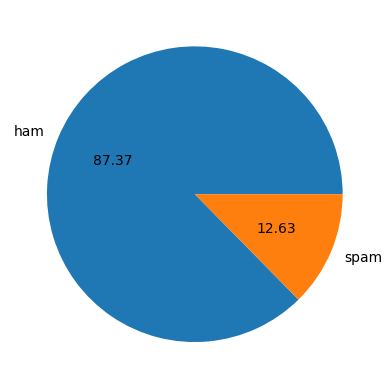

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Now, we will import nltk.
**NLTK (Natural Language Toolkit)** is a leading Python library for natural language processing (NLP). It provides a collection of tools and resources for tasks such as:

* **Tokenization:** Breaking text into words or sentences.
* **Stemming:** Reducing words to their root form (e.g., "running" -> "run").
* **Lemmatization:** Reducing words to their dictionary form (e.g., "better" -> "good").
* **Part-of-speech tagging:** Identifying the grammatical category of words (e.g., noun, verb, adjective).
* **Named entity recognition:** Identifying named entities like people, organizations, and locations.
* **Sentiment analysis:** Determining the sentiment expressed in text (positive, negative, neutral).
* **Parsing:** Analyzing the grammatical structure of sentences.

In [15]:
# importing nltk (Natural Language Toolkit), a leading Python library for NLP
# !pip install nltk
import nltk

Now we will download `punkt` from `nltk`.

**Punkt** is a tokenizer in the Natural Language Toolkit (NLTK) that is specifically designed for English text. It uses a statistical model to identify sentence boundaries based on a set of rules and patterns.

**Key features of Punkt:**

* **Language-specific:** Punkt is trained on a large corpus of English text, making it well-suited for English language tokenization.
* **Statistical model:** It uses a statistical model to identify sentence boundaries, which can be more accurate than simple rule-based methods.
* **Customizability:** You can train your own Punkt tokenizer on different corpora to adapt it to specific domains or languages.

Punkt is a valuable tool for tasks like text summarization, machine translation, and information retrieval, where accurate sentence segmentation is essential.

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 4.1 Creating New Features
For the purpose of data exploration, I am creating new features

* **No_of_Characters**: Number of characters in the text message
* **No_of_Words**: Number of words in the text message
* **No_of_sentence**: Number of sentences in the text message

In [17]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## 4.2 Quick Statistical Summary

In [18]:
# checking the quick statistical summary of the newly created features
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


This shows that there are 18 words on average in each message and every message consist of 2 sentences approximately.

In [19]:
# for ham messages
# checking the quick statistical summary of the newly created features for HAM messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


This shows that there are 17 words on average in each **ham message**,  and every message consist of nearly 2 sentences approximately.

In [20]:
# for spam messages
# checking the quick statistical summary of the newly created features for SPAM messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


This shows that there are 27 words on average in each **spam message**,  and every message consist of nearly 3 sentences approximately.
It means **spam messages** are greater in length than **ham messages**.

## 4.3 Histplot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


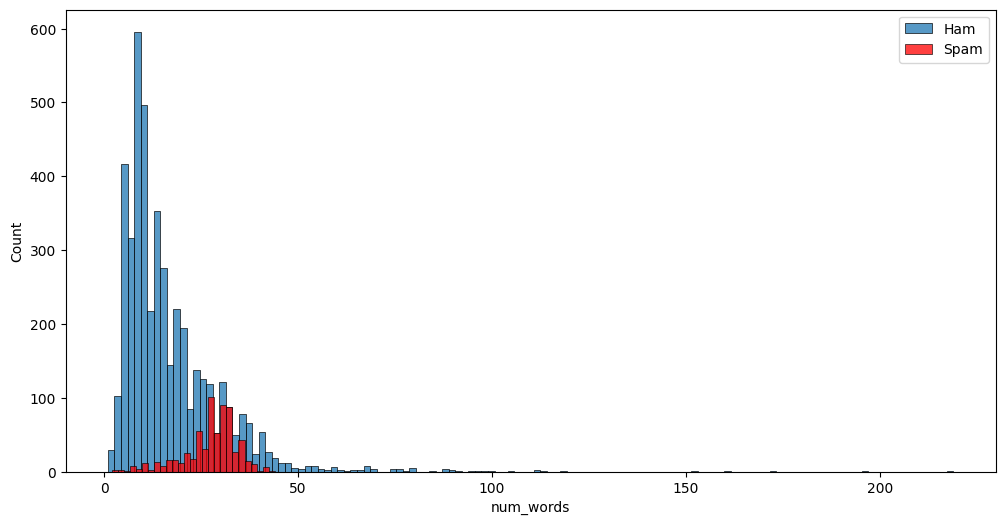

In [21]:
# now displaying the word count for HAM & SPAM messages with the help of histogram plot
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'], label='Ham')
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Spam')
plt.legend()

Graphical representation also shows that there are 17 words on average in each **ham message** and 27 words on average in each **spam message**.

# 5. Data Preprocessing

## 5.1 Text Cleaning

The data cleaning process in NLP is crucial. The computer doesn’t understand the text. For the computer, it is just a cluster of symbols. To further process the data we need to make the data cleaner.

We will import the necessary libraries for text cleaning and pre-processing and define a function perform the following steps:
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


**Lower Case:** Converting all letters in a text to lowercase. "Hello, World!" becomes "hello, world!"

**Tokenization:** Breaking down a text into smaller units, typically words or sentences. "This is a sentence." becomes ["This", "is", "a", "sentence"]

**Removing Special Characters:** Removing non-alphanumeric characters from a text. "Hello, world! 123@#" becomes "Hello world 123".

**Removing Stop Words and Punctuation:** Removing stopwords/common words i.e. (like "the", "and", "in") and punctuation marks from a text. "The quick brown fox jumps over the lazy dog." becomes "quick brown fox jumps lazy dog".

**Stemming:** Reducing words to their root form. "running", "runs", and "ran" can all be stemmed to "run".

In [22]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing stopwords for stopwords removal i.e. (like "the", "and", "in").
from nltk.corpus import stopwords

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Defining a text preprocessing function
def transform_text(text):
    
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum(): # is alphanumeric?
            y.append(i)
    text = y[:]
    y.clear()
    
    # Removing stop words and punctuation
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    # Stemming using Porter Stemmer
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [23]:
# Checking this function with sample text
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [24]:
# Applying text transformation and creating a new column "transformed_text"
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 5.2 Word Cloud
A word cloud is a visual representation of text data which is often used to depict keyword metadata on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color. These visualizations help highlight important or frequently occurring terms within a given context. Businesses often use word clouds to analyze customer feedback, employee opinions, SEO keywords, and more.

Now we're going to analyse the preprocessed data to get an understanding of it. We'll plot Word Clouds for **ham** and **spam** messages from our dataset and see which words occur the most.

Text(0.5, 1.0, 'Ham Messages')

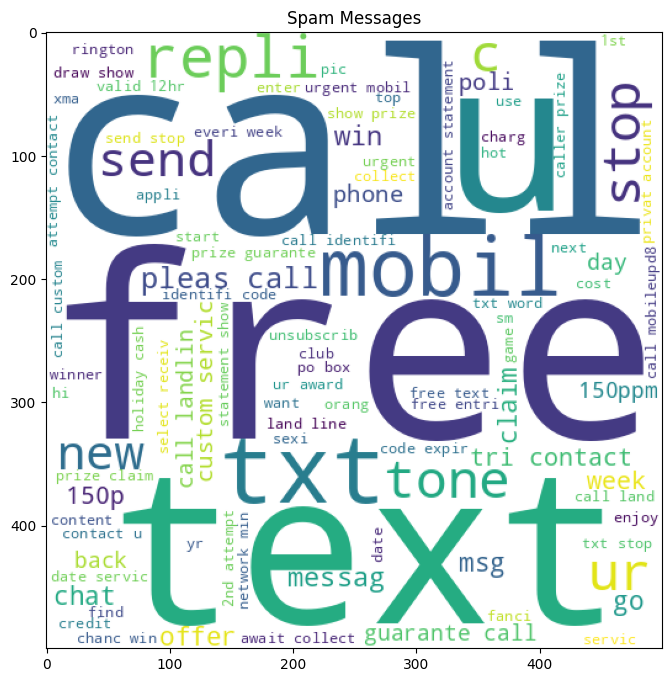

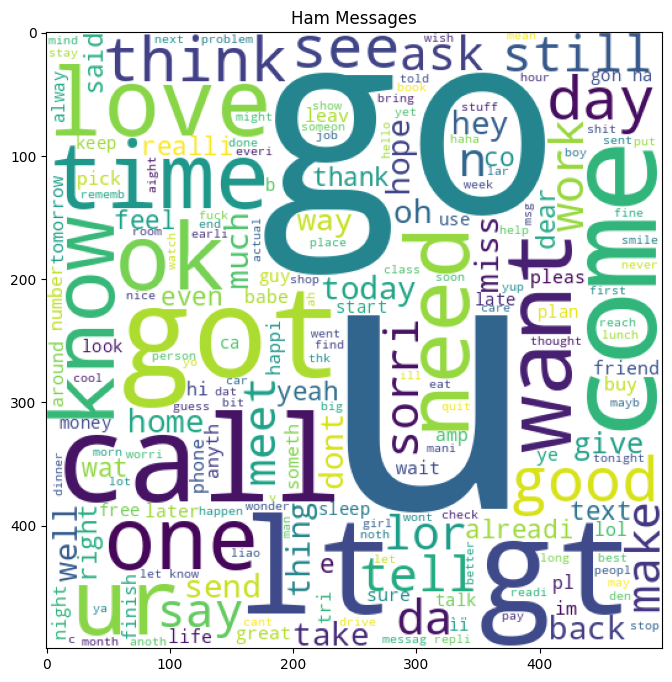

In [25]:
# Import the WordCloud library for generating word clouds
from wordcloud import WordCloud

# Define parameters for the WordCloud (width, height, minimum font size, background color)
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Filter spam messages from the DataFrame
spam_messages = df[df['target'] == 1]['transformed_text']
# Concatenate all spam messages into a single string (separated by spaces)
spam_text = spam_messages.str.cat(sep=" ")
# Generate a WordCloud for the spam messages
spam_wc = wc.generate(spam_text)
# Create a figure for displaying the spam WordCloud
plt.figure(figsize=(12, 8))
# Display the spam WordCloud
plt.imshow(spam_wc)
# Add a title for the spam WordCloud
plt.title('Spam Messages')

# Filter ham messages from the DataFrame
ham_messages = df[df['target'] == 0]['transformed_text']
# Concatenate all ham messages into a single string (separated by spaces)
ham_text = ham_messages.str.cat(sep=" ")
# Generate a WordCloud for the ham messages
ham_wc = wc.generate(ham_text)
# Create a figure for displaying the ham WordCloud
plt.figure(figsize=(12, 8))
# Display the ham WordCloud
plt.imshow(ham_wc)
# Add a title for the ham WordCloud
plt.title('Ham Messages')

## 5.3 Most Frequent Words
Now we will display the top 30 words used in each category (ham or spam) of messages.

In [26]:
# Create an empty list to store spam corpus
spam_corpus = []

# Iterate through each spam message in the DataFrame
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    # Split the message into individual words
    for word in msg.split():
        # Append each word to the spam corpus list
        spam_corpus.append(word)

# Calculate the length of the spam corpus (number of words)
length_of_spam_corpus = len(spam_corpus)

print("Length of spam corpus:", length_of_spam_corpus)

Length of spam corpus: 9883


In [27]:
from collections import Counter
# Get the 30 most common words in spam messages and thier count
most_common_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))
most_common_spam

,0,1
0,call,320
1,free,189
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


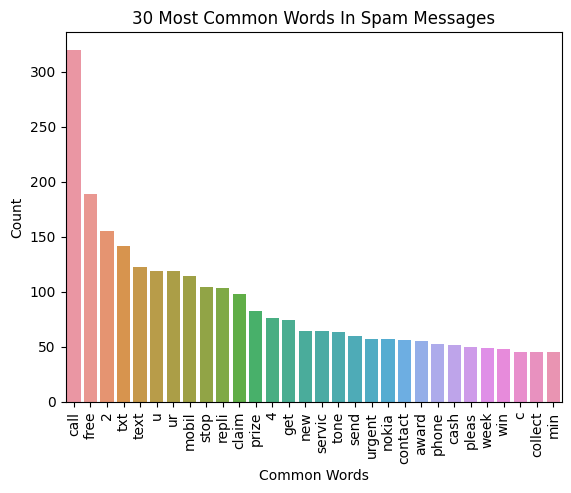

In [28]:
# Display the 30 most common words in spam messages and thier count using bar chart
sns.barplot(data=df, x=most_common_spam[0],y=most_common_spam[1])
plt.xticks(rotation='vertical')
plt.title("30 Most Common Words In Spam Messages")
plt.xlabel("Common Words")
plt.ylabel("Count")
plt.show()

Similarly, doing the same with **Ham Messages**

In [29]:
# Create an empty list to store ham corpus
ham_corpus = []

# Iterate through each ham message in the DataFrame
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    # Split the message into individual words
    for word in msg.split():
        # Append each word to the ham corpus list
        ham_corpus.append(word)

# Calculate the length of the ham corpus (number of words)
length_of_ham_corpus = len(ham_corpus)

print("Length of ham corpus:", length_of_ham_corpus)

Length of ham corpus: 34771


In [30]:
# Get the 30 most common words in ham messages and thier count
most_common_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
most_common_ham

,0,1
0,u,871
1,go,401
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,272
7,got,236
8,like,234
9,know,234


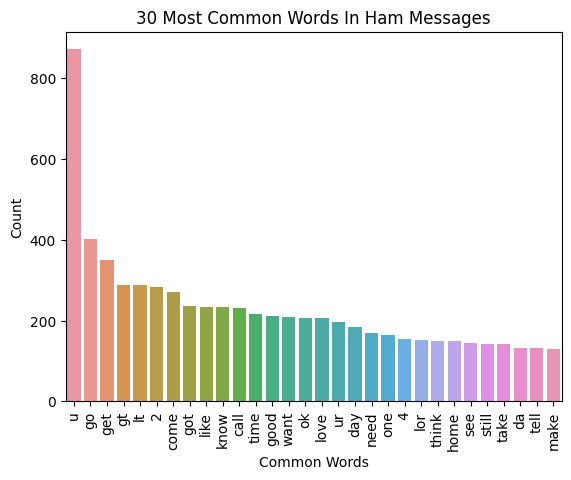

In [31]:
# Display the 30 most common words in ham messages and thier count using bar chart
sns.barplot(data=df, x=most_common_ham[0],y=most_common_ham[1])
plt.xticks(rotation='vertical')
plt.title("30 Most Common Words In Ham Messages")
plt.xlabel("Common Words")
plt.ylabel("Count")
plt.show()


# 6. Model Building

Now, we will build machine learning models to peform our classification task.
Steps involved in the Model Building are:

* Setting up features and target as X and y
* Splitting the testing and training sets
* Use following different model classifiers.
    * **Logistic Regression**
    * **Support Vector Machine (SVM)**
    * **Multinomial Naive Bayes**
    * **Decision Tree**
    * **K-Nearest Neighbors (KNN)**
    * **Random Forest**
    * **AdaBoost**
    * **Bagging**
    * **Extra Trees**
    * **Gradient Boosting**
    * **XGBoost**
* Fit all the models on training data
* Evaluate performance of each model

## 6.1 TF-IDF Vectorization

TF-IDF provides a valuable way to represent text data into numeric data and extract meaningful features, making it a fundamental technique in natural language processing. In the realm of NLP, transforming text into numerical representations is essential for various tasks. TF-IDF vectorization stands out as a powerful technique for this purpose. TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a method to represent text documents as numerical vectors. It measures the importance of a term within a document relative to the entire corpus.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF Vectorization
# tfidf = TfidfVectorizer(max_features=3000)
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [33]:
y = df['target'].values

In [34]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [36]:
# Loading Models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [37]:
# Creating a dictionary of models
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [38]:
from sklearn.metrics import accuracy_score, precision_score

# defining a function to train a model, predict the outputs and calculate accuracy and precision scores
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [39]:
# checking the defined function using SVC classifier
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9661016949152542)

# 7. PERFORMANCE EVALUATION

Accuracy score alone may not be the best parameter to choose the best classifier.
Therefore, precision_score should also be calculated and considered.
The precision is the ratio TP / (TP + FP) where TP is the number of true positives and TP the number of false positives.
The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
Precision = 1 for FP = 0 and precision goes up when FP goes down.

For a binary classification task, there are 4 possible results:

TN: True negatives (ham mails labeled as ham)
FP: False positives (ham mails labeled as spam)
FN: False negatives (spam mails labeled as ham)
TP: True positives (spam mails labeled as spam)

# 7. PERFORMANCE EVALUATION

**Accuracy_score** alone may not be the best parameter to choose the best classifier.
Therefore, **precision_score** should also be calculated and considered.


The precision is the ratio TP / (TP + FP) where TP is the number of true positives and TP the number of false positives.


The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

Precision = 1 for FP = 0 and precision goes up when FP goes down.

For a binary classification task, there are 4 possible results:

* TN: True negatives (ham mails labeled as ham)
* FP: False positives (ham mails labeled as spam)
* FN: False negatives (spam mails labeled as ham)
* TP: True positives (spam mails labeled as spam)

In [40]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9661016949152542
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9320388349514563
For  RF
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9298245614035088
For  BgC
Accuracy -  0.960348162475822
Precision -  0.875968992248062
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.8928571428571429
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.9354838709677419


In [41]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores}
                             ).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.976789,0.991379
8,ETC,0.975822,0.974790
0,SVC,0.972921,0.966102
10,xgb,0.970986,0.935484
4,LR,0.952611,0.932039
6,AdaBoost,0.961315,0.929825
9,GBDT,0.951644,0.892857
7,BgC,0.960348,0.875969


In [42]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.976789
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,xgb,Accuracy,0.970986
6,LR,Accuracy,0.952611
7,AdaBoost,Accuracy,0.961315
8,GBDT,Accuracy,0.951644
9,BgC,Accuracy,0.960348


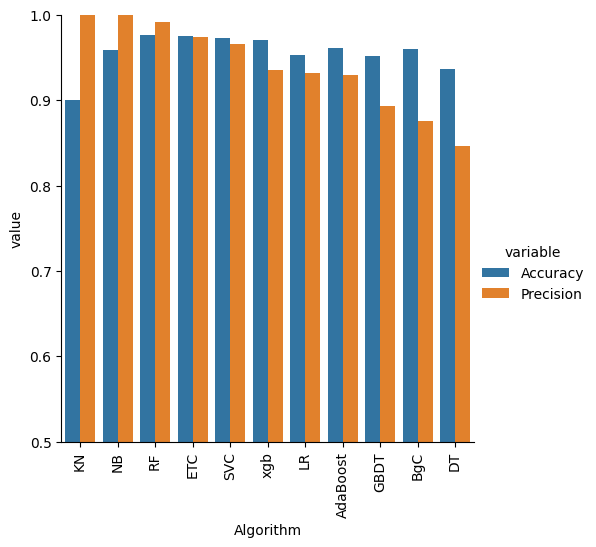

In [43]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## 7.1 Interpreting the Classification Results
Here, we have the accuracy and precision scores for 11 different classification algorithms. Accuracy measures the overall correctness of predictions, while precision measures the proportion of correct positive predictions.

**Key Observations:**

* **KN and NB:** Both KN (K-Nearest Neighbors) and NB (Naive Bayes) achieved perfect precision (1.0), indicating that they never misclassified positive instances.
* **RF, ETC, and SVC:** Random Forest (RF), Extra Trees (ETC), and Support Vector Classifier (SVC) also performed well, with high accuracy and precision scores.
* **XGBoost and LR:** XGBoost and Logistic Regression (LR) had slightly lower precision scores compared to the top-performing models, but still achieved good overall accuracy.
* **Gradient Boosting (GBDT) and Bagging (BgC):** These ensemble methods also performed well, with reasonable accuracy and precision scores.
* **Decision Tree (DT):** DT had the lowest accuracy and precision scores among the models, suggesting that it might be overfitting the training data or struggling to capture complex relationships.

# 8. Ensemble Methods
**Voting classifiers** and **stacking classifiers** are ensemble methods that combine the predictions of multiple base models to improve overall performance.
## 8.1 Voting Classifier

A voting classifier is an ensemble machine learning method that combines the predictions of multiple base classifiers to make a final prediction. It's a popular technique for improving the performance of models, especially when dealing with complex problems.

**How Voting Classifiers Work:**

1. **Multiple Base Classifiers:** A voting classifier uses several different base classifiers, such as decision trees, random forests, support vector machines, or neural networks.
2. **Training:** Each base classifier is trained independently on the same training data.
3. **Prediction:** When making a prediction for a new data point, each base classifier provides its own predicted class.
4. **Combining Predictions:** The voting classifier combines these individual predictions to produce a final prediction.

**Types of Voting:**

* **Hard Voting:** The most common method. The class with the majority of votes from the base classifiers is chosen as the final prediction.
* **Soft Voting:** Each base classifier's prediction is weighted based on its confidence score. The class with the highest weighted sum of probabilities is chosen as the final prediction.

**Advantages of Voting Classifiers:**

* **Improved Performance:** Voting classifiers often outperform individual base classifiers, especially when the base classifiers are diverse and have complementary strengths.
* **Reduced Overfitting:** Combining multiple models can help reduce overfitting, which occurs when a model is too complex and performs poorly on new data.
* **Increased Robustness:** Voting classifiers are more robust to noise and outliers in the data.

**Key Considerations:**

* **Base Classifier Diversity:** It's important to use base classifiers with different strengths and weaknesses to maximize the benefits of voting.
* **Computational Cost:** Training and predicting with multiple base classifiers can be computationally expensive.
* **Hyperparameter Tuning:** The hyperparameters of the base classifiers and the voting classifier itself may need to be tuned to achieve optimal performance.

In [44]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier()

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc), ('rf', rfc)],voting='soft')
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 1.0


**Accuracy:** 0.9787234042553191

* This indicates that our voting classifier correctly predicted 97.87% of the instances in our test dataset. It's a very high accuracy, suggesting that our model is performing well overall.

**Precision:** 1.0

* This is a perfect precision score, meaning that every positive prediction made by our model was indeed correct. In other words, there were no false positives. This is an excellent result, especially when dealing with imbalanced datasets.

**Overall:**

Our voting classifier has achieved excellent performance based on the provided accuracy and precision scores. This suggests that the combination of SVM, MNB, ETC, and RF models is effective in our classification task.

## 8.2 Stacking Classifier
**Stacking**, also known as stacked generalization, is an ensemble machine learning method that combines the predictions of multiple base classifiers to improve overall performance. It's a more complex approach compared to simple voting classifiers.

**How Stacking Works:**

1. **Base Classifiers:** Multiple base classifiers (e.g., decision trees, random forests, SVM) are trained on the same training data.
2. **Meta-Learner (Final Estimator):** A meta-learner model (Final Estimator) (e.g., logistic regression, another decision tree) is trained to combine the predictions of the base classifiers.
3. **Prediction:** To make a prediction for a new data point, each base classifier provides its prediction. These predictions are then combined by the meta-learner to produce the final prediction.

**Key Steps:**

1. **Split Data:** The training data is typically split into two parts: a training set to train the base classifiers and a validation set to train the meta-learner.
2. **Train Base Classifiers:** Each base classifier is trained on the training set.
3. **Generate Meta-Features:** The predictions of the base classifiers on the validation set are used as features for the meta-learner.
4. **Train Meta-Learner (Final Estimator):** The meta-learner is trained on the meta-features and the corresponding true labels from the validation set.
5. **Make Predictions:** To make predictions on new data, the base classifiers are used to generate predictions, which are then combined by the meta-learner to produce the final prediction.

**Advantages of Stacking:**

* **Improved Performance:** Stacking can often outperform individual base classifiers by combining their strengths and reducing their weaknesses.
* **Flexibility:** It allows for the use of different types of base classifiers and meta-learners.
* **Interpretability:** The meta-learner (Final Estimator) can provide insights into how the base classifiers contribute to the final prediction.

**Challenges:**

* **Complexity:** Stacking can be more complex to implement compared to simpler ensemble methods like bagging and boosting.
* **Computational Cost:** Training multiple base classifiers and a meta-learner can be computationally expensive.

Stacking is a powerful technique for improving the performance of machine learning models, especially when dealing with complex problems. By combining the predictions of multiple base classifiers, stacking can help to reduce bias, variance, and overfitting.

In [45]:
from sklearn.ensemble import StackingClassifier
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


**Accuracy:** 0.9796905222437138

* This indicates that our stacking classifier correctly predicted 97.97% of the instances in our test dataset. It's a very high accuracy, suggesting that our model is performing well overall.

**Precision:** 0.9465648854961832

* Precision measures how many of the positive predictions made by our model were actually correct. In this case, our model correctly identified 94.66% of the positive instances. This is a good precision score, but it's slightly lower than the perfect precision we achieved with the voting classifier.

**Overall:**

Our stacking classifier has achieved excellent overall performance, with a very high accuracy and a respectable precision score. The combination of SVM, MNB, ETC, and the RF meta-learner seems to be working effectively.

# 9. Deploy Model

In [46]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

# 10. Conclusion
* Based on the individual results, KN, NB, RF, ETC, and SVC appear to be the top-performing models in terms of both accuracy and precision.
* The choice of the best model might depend on specific requirements and trade-offs between accuracy and precision. For example, if minimizing false positives is crucial, models with high precision (e.g., KN, NB, RF) would be preferred.

Our voting classifier achieved excellent performance based on the provided accuracy and precision scores. This suggests that the combination of SVM, MNB, ETC, and RF models is effective in our classification task.

Our stacking classifier achieved excellent overall performance, with a very high accuracy and a respectable precision score. The combination of SVM, MNB, ETC, and the RF meta-learner seems to be working effectively.

The selection of the optimal model should consider factors beyond just accuracy, such as computational efficiency and the specific requirements of the application. It is advisable to perform further model fine-tuning and validation before making a final choice

**Your feedback means a lot to me!**

**Please feel free to share your valueable input or suggestions so that I could be able to code even better.**